# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 20 (Thursday) 11:00 pm </b> </font>

<font color="blue"> Poorna Chandrika Maddisetty </font>

# Introduction

The objective of this assignment is to implement least square and least mean square on the regression dataset.I have used pandas, numpy libraries on the dataset and calculated the w for both the experiments and plotted the result data

# Data 




## Description of Data for Regression

The data set I chose for regression is appliances energy prediction. It is all about the energy consumption of the appliances used in a low energy building. It contains 19375 instances and 29 attributes. The data is gathered about 10 min in 4.5 months. The temperature levels and the humidity conditions in different rooms of the house was monitered using ZigBee wireless sensor network.

Also the data from the nearest airport weather station has been collected and merged with the data sets using the ddate and time column.

The data has a date attribute indicating the timestamp at which this is recorded, Appliances atribute indicating the energy use of all appliances in the house in Wh, light indicates the total energy with the use of light fixtures in the house, T1-T9 are the temperature values recorded in the rooms. Rh_1 to Rh_9 are the humidity conditions in different rooms.Also the pressure, humidity, visibility , Tdewpoint are columns merged with the help of weather station data. Also two random varibles have been included in the data set. The goal is to remove all the indepenent features and effecitively predict the data

# SOURCE OF DATA

I gathered this dataset from the UCI respository

https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction


# READING THE DATA

I am using the pandas library to read the data set and matplot lib and seaborn to visually represent the data and relationships between them

In [159]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [160]:
df = pd.read_csv("energydata_complete.csv", parse_dates=['date'])
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# PREPROCESSING OF THE DATA


<br>Handling the null values and handling the strings are the basic steps to perform to make the data ready for the process and apply the machine learning algorithm . Null values in the data can be checked using the numpy library.<br>

In [161]:
df.isnull()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [162]:
np.any(df.isnull())

False

# VISUALIZATION OF THE DATA

<br>As my data do not contain any null values, and any categorical values my pre processing step was easier. To visualise the data I am using bar graphs, scatterplots, violinplots, pointplots and pairplots to represent the relationship between the attributes <br>

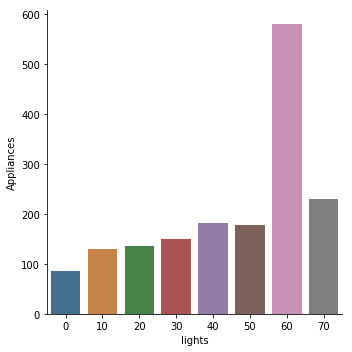

In [163]:
sb.catplot(x="lights", y="Appliances", data=df, saturation=.5, ci=None, kind="bar")

In [164]:
df2=df.groupby(df['date'].dt.strftime('%B'))['Appliances'].sum().sort_values()
df2

date
January     283510
May         362950
February    421550
April       427200
March       432800
Name: Appliances, dtype: int64

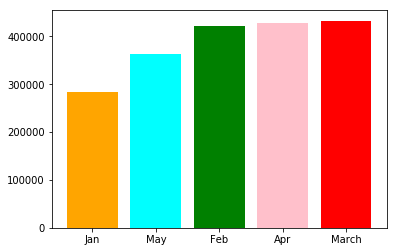

In [96]:
months = ["Jan","May","Feb","Apr","March"]
dataplt = plt.bar(months,df2,color=['orange', 'cyan', 'green', 'pink', 'red'])

In [97]:
df3=df.groupby(df['date'].dt.strftime('%B'))['lights'].sum().sort_values()
df3

date
May          6820
April       10440
January     13800
March       17480
February    26490
Name: lights, dtype: int64

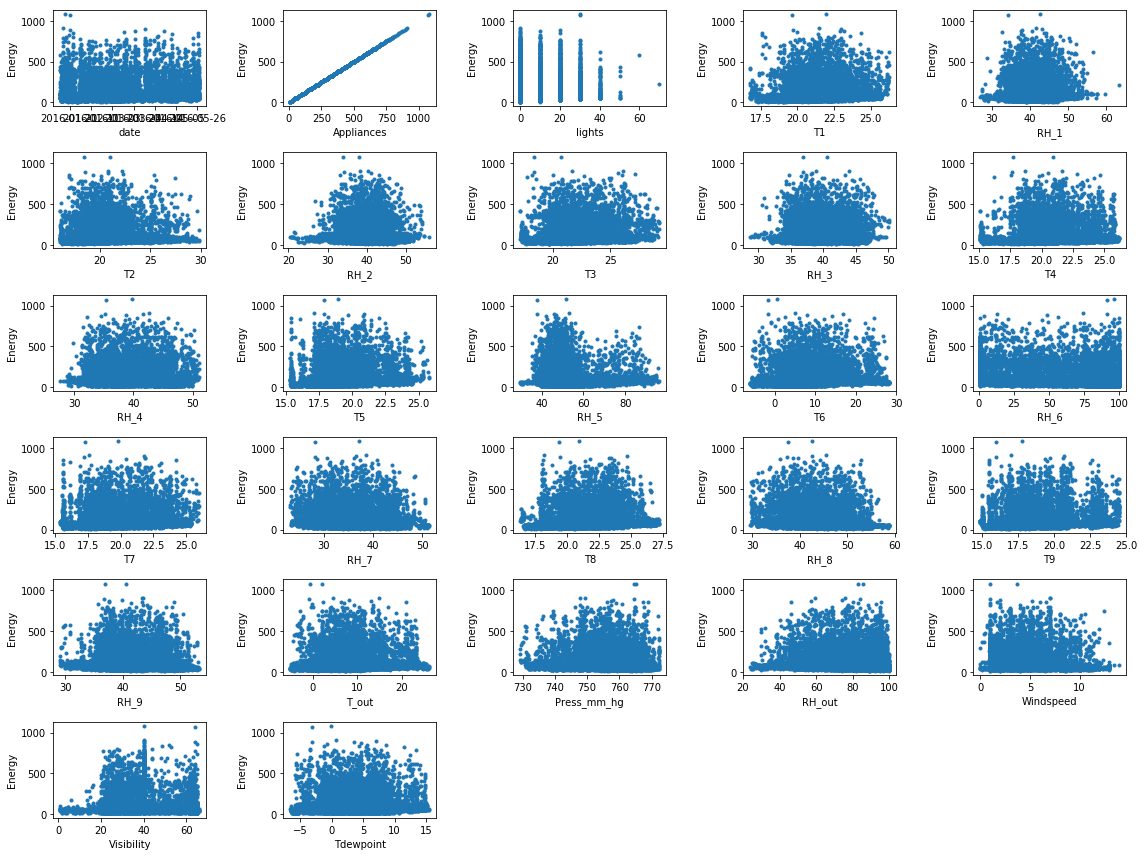

In [98]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(27):
    plt.subplot(6, 5, i+1)
    plt.plot(df.iloc[:,i],df.Appliances, '.')
    plt.xlabel(df.columns.values[i])
    plt.ylabel("Energy")
fig.tight_layout()

In [99]:
bins = [0, 1, 5, 10, 25, 50, 100]
df['Energy'] = pd.cut(df['Appliances'], bins)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Energy
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,"(50, 100]"
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,"(50, 100]"
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,"(25, 50]"
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,"(25, 50]"
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,"(50, 100]"


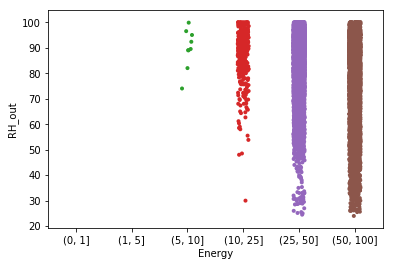

In [100]:
sb.stripplot(x="Energy",y="RH_out", data=df ,size=4)

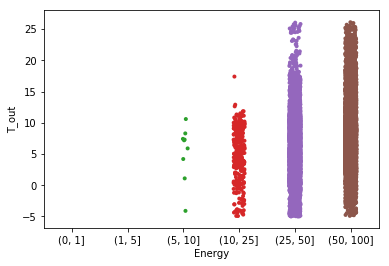

In [101]:
sb.stripplot(x="Energy", y="T_out", data=df, size=4)

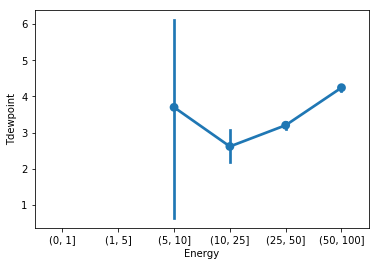

In [102]:
sb.pointplot(x="Energy", y="Tdewpoint", data=df)

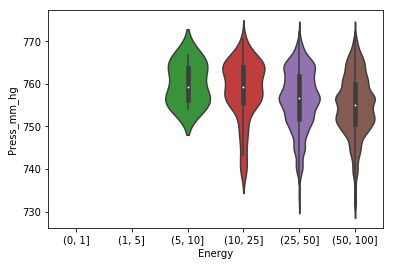

In [103]:
sb.violinplot(x="Energy", y="Press_mm_hg", data=df)

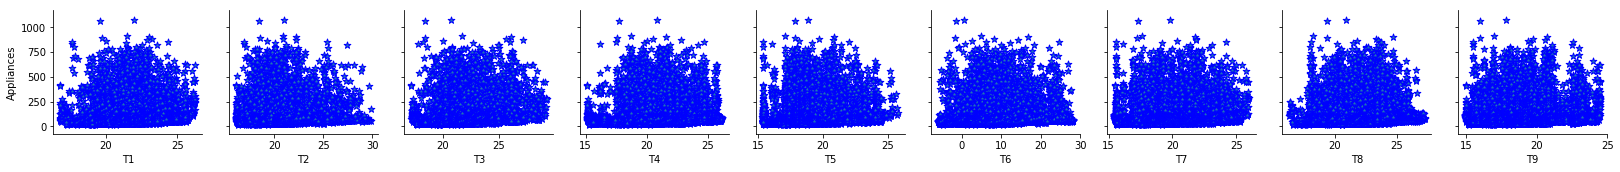

In [104]:
sb.pairplot(df, x_vars=["T1","T2","T3","T4","T5","T6","T7","T8","T9"], y_vars=["Appliances"], markers="*",plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

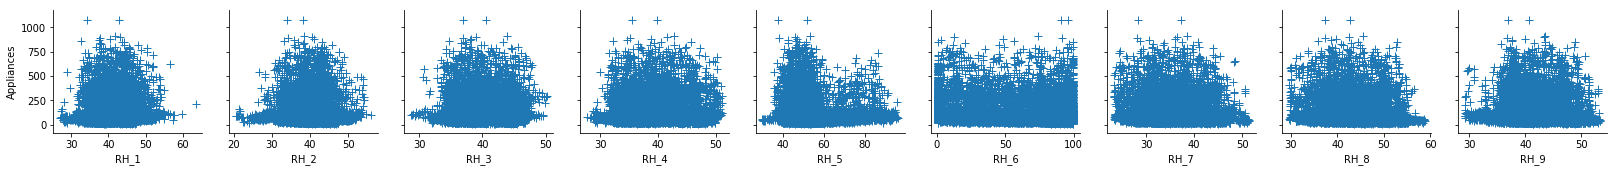

In [105]:
sb.pairplot(df, x_vars=["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"], y_vars=["Appliances"], markers="+",plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

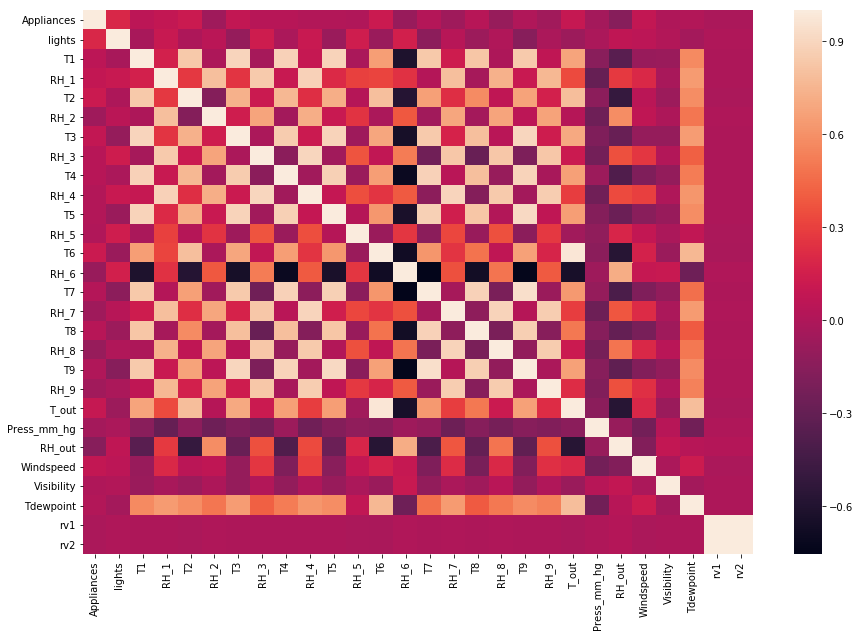

In [106]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr())

# PRELIMINARY OBSERVATION

<br>Based on the folowwing visualizations I oberved the following information.By using various models as we progress we will be able to predict the exact value and the variables dependent to calculate the energy usage. <br>

1. The energy usage is very high during the month of march, but there is no specific pattern that cana be observed based on monthly energy distribution, Similarly for the light fixtures distribution during these months Febraury has the highest value.

2. The relation between the usage of lights and the total energy cannot be predicted here as the energy usage increases with lights up to 60 wh and then it started decreasing a little.

3. Based on the pairplots and the scatter plots it is noticeable that as the temperature is increasing the energy usage is increasing

4. Similar plots for the humidity values is plotted and as the humidity increases the energy usage is increasing

5. The values collected from the nearest weather station also had little effect on the energy usage.

6. The column Tdewpoint was constant with the increasing levels of energy and I feel that this need not to be considered for prediction

7. From the violin plots I noticed that as the pressure increases the energy usage was increasing a little

8. Similarly from the violin plot, as the windspeed increases the energy usage was decreasing.

9. The temperature and the humidty of the weather station also had effects on the energy usage and they are directly proportional in this case to the energy usage

8. All the attributes except Tdewpoint and Pressure are the dependent attributes that can be used for predicting the energy use. Also the usage of light fixtures, temperature and humidity values of various rooms play an important role while predicting<br>

# Method

Linear Rregression is a statistical approach for modelling relation between  between a dependent variable with a given set of independent variables. The task is to find the line which fits best with the training data so that we can predict the response for any new feature values. This line is called the regression line


## Review

In linear models we perform the dot product of x and w, where w is the weight matrix and x is the feature matrix. We compute w using two techniques they are:
1. Least Squares
2. Least Mean Squares

I have a base class called BaseModel which has two abstract methods train and use and these methods are implemented in the respective classes. A Linear model class which is inheriting the base model has the methods to check the matrix and ones to a matrix. The classes Linear Regress and LMS are the ones that are used for calculating least squares and least mean squares respectively. In both the methods I use the train step to compute the value of w and the 'use' method to compute the dot product

### Super Classs Definition

In [107]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [108]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        self._check_matrix(X, 'X')
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X))
        #self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
        self.w = np.linalg.lstsq(X1.T @ X1, X1.T @ T)[0]
    
    # apply the learned model to data X
    def use(self, X):
        self._check_matrix(X, 'X')
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X))
        return X1 @ self.w
        pass  ## TODO: replace this with your codes

#  Least Squares Implementation

Least squares is a way to find the best fit curve or line for a set of points. In this technique, the sum of the squares of the offsets (residuals) are used to estimate the best fit curve or line instead of the absolute values of the offsets.

The train method calculates w based on the formula :

$$
w = \big(X^\top X\big)^{-1} X^\top T
$$

Ones are added to the matrix using add_ones function or using hstack and then w is computed for the matrix for X and Target matrix T

In use function , the dot product of X and T is computed and returned


### Least Mean Squares

In [109]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        N = X.shape[0]
        for k in range(N):
            self.train_step(X[k],T[k])
        pass 
    
    
    # train LMS model one step 
    # here the x is 1d vector
    
    def train_step(self, x, t): 
        le=len(x)
        #print(len(x))
        #print (type(x))
    
        #x = np.hstack((np.ones((x.shape[0], 1)), x.reshape((1,le))))
        x = x.reshape(1,le)
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        #print (type(x))
        #print(x.shape)
        if(self.w is None):
            self.w =np.zeros((x.shape[1],1))
       # print(self.w.shape)
        y=x @ self.w
        k=self.alpha * (y-t) * x
        k=k.reshape(k.shape[1],-1)
        #print(k.shape)
        self.w -= k
        
        pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X))
        return X1 @ self.w
        pass  ## TODO: replace this with your codes
        

# Least Mean Squares Implementation

It is observed that the least squares use all the available data for training or finding the best fit. This can be often computationally costly, especially with large data sets. When data is sufficiently large, we can consider sequential or online learning. During the online learning process, we introduce a data point one by one, and update the parameters. Using the updated parameters, it makes a new estimation and repeat these steps

In train function, the feature and target matrices are recieved and they are passed to the train_step method as single dimension vectors.
<br>
In train_step method you compute the w value for the single dimensional x and t : <br><br>
First x is reshaped to (1,number of coumns) as it has only one row and m number of columns.<br>
one's are added to X using hstack function or add_ones function.<br>
W is intially nonetype, so it is initialised with zeros using np.zeros() function.<br>
Then W is computed using the formula
$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$
<br>
As the k value doesn't match with the computed w value to perform the computation, k is reshaped or transposed to match w , in this step (self.w -= k) to be able to perform the substraction.

In the use function, the dot prouct of x and w is calculated and returned

### Usage Examples

In [110]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\poorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


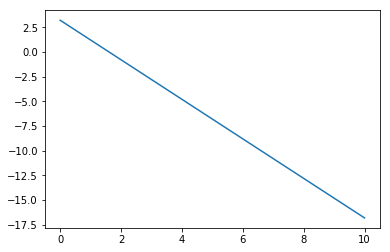

In [111]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

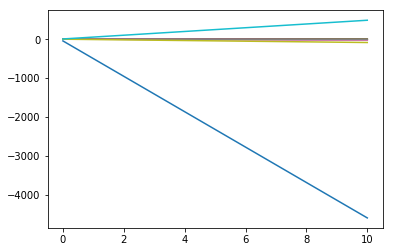

In [112]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

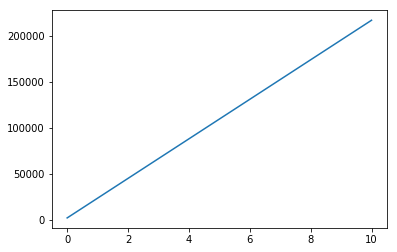

In [113]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Least Squares and Least Mean Square methods are computed for my Energy Prediction dataset. The feautures are made in a seperate matrix called X, and the target variable is dropped from the dataframe and it is stored in a variable called T. 
<br>
I dropped the date column as it is seen that the target variable is independent of the date parameter.
Linear Regression class is called for the dataset.

In [114]:
T=df.iloc[:,1];
T=np.array(T)
T=T.reshape(T.size,1)
T.shape

(19735, 1)

Dropping the date column as sit is not necessary and also dropping the energy column that is created to store the energy categorical bins

In [115]:
X = df
X = X.drop('Appliances',axis=1)
X= X.drop('date',axis=1)
X=X.drop('Energy',axis=1)
X.shape

(19735, 27)

In [116]:
Tlog = np.log(T + 1)

In [117]:
lg=LinearRegress()
lg.train(X, Tlog)

C:\Users\poorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [118]:
Y = lg.use(X)
E = Tlog-Y
E

array([[-0.64946813],
       [-0.54566084],
       [-0.69131321],
       ...,
       [ 0.97481984],
       [ 1.45686602],
       [ 1.58379086]])

The mean square error before normalizing the data is given below

In [119]:
np.sqrt(np.mean((Tlog - Y)**2))

0.5528892296365653

# Normalizing the data for Least square Implementation

Data is normalized to manage the huge values that are present in the data set.
Normalization helps in providing better results and more informative weights

In [120]:
mu = X.mean() 
std = X.std()
nX = (X - mu) / std

In [121]:
lg=LinearRegress()
lg.train(nX, Tlog)

C:\Users\poorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [122]:
Y = lg.use(nX)
E = Tlog-Y
E

array([[-0.64946813],
       [-0.54566084],
       [-0.69131321],
       ...,
       [ 0.97481984],
       [ 1.45686602],
       [ 1.58379086]])

In [123]:
(Tlog - Y)**2

array([[0.42180885],
       [0.29774575],
       [0.47791396],
       ...,
       [0.95027373],
       [2.12245861],
       [2.50839349]])

In [124]:
np.mean((Tlog - Y)**2)

0.30568650024811467

In [125]:
np.sqrt(np.mean((Tlog - Y)**2))

0.5528892296365653

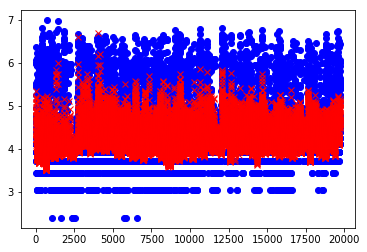

In [126]:
plt.plot(Tlog, 'ob')
plt.plot(Y, 'xr')

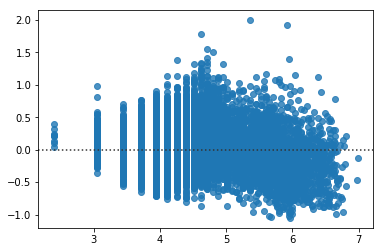

In [127]:
sb.residplot(np.array(Tlog),np.array(Y))

The value is same for the data even before or after the normalization

# Least mean square Implementation using Normalized data

From above it can be inferre that for my data set normalization did not help in providing better results. Least mean square is implemented on the normalized dataset

In [128]:
nlms=np.array(nX)
nlms.shape

(19735, 27)

In [129]:
lems = LMS(0.01)
lems.train(nlms, Tlog)

In [130]:
Y2 = lems.use(nlms)
E = Tlog-Y2
E

array([[-2.49184168],
       [-2.49626758],
       [-2.6483933 ],
       ...,
       [-0.53639908],
       [ 0.02887145],
       [ 0.07884395]])

In [131]:
(Tlog - Y2)**2

array([[6.20927497e+00],
       [6.23135182e+00],
       [7.01398707e+00],
       ...,
       [2.87723977e-01],
       [8.33560489e-04],
       [6.21636888e-03]])

In [132]:
np.mean((Tlog - Y2)**2)

1.5906458502632732

In [133]:
np.sqrt(np.mean((Tlog - Y2)**2))

1.2612080915785757

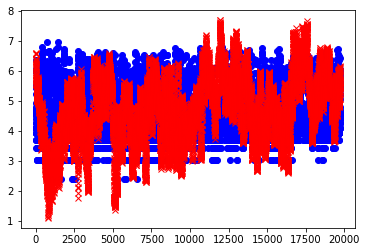

In [134]:
plt.plot(Tlog, 'ob')
plt.plot(Y2, 'xr')

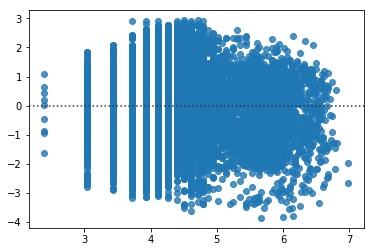

In [135]:
sb.residplot(Tlog,Y2)

# Partitioning the data for train and test

Data partition helps us to go close to the model. As we are training our model on a different data and testing our model on a different data it helps us to identify the actual RMSE value and thee accuracy of our model.
    It is the measure for the performance with unseen data

In [136]:
def normalize(X):
    mu = X.mean() 
    std = X.std()
    return (X - mu) / std


In [137]:
xlms=normalize(X)
ylms=normalize(T)


In [138]:
from sklearn.model_selection import train_test_split
X_tr, X_test, T_tr, T_test = train_test_split(xlms, ylms, test_size = 0.33, random_state = 5)

print(X_tr.shape)

print(X_test.shape)

print(T_tr.shape)
print(T_test.shape)

(13222, 27)
(6513, 27)
(13222, 1)
(6513, 1)


# Least Square Implementation on Train and Test data

The train data is obtained from scikit learn package is passed as input to the train method and the test data is passe to the use function

In [139]:
plg=LinearRegress()
plg.train(X_tr, T_tr)

C:\Users\poorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [140]:
Ypred = plg.use(X_test)

In [141]:
E = T_test-Ypred
E

array([[ 0.21527805],
       [ 0.46784188],
       [-0.46670782],
       ...,
       [ 1.90549058],
       [ 0.05815686],
       [-0.22561489]])

In [142]:
np.sqrt(np.mean((T_test - Ypred)**2))

0.9362159304985647

In [143]:
from sklearn.metrics import r2_score
r2_score(T_test, Ypred)

0.15823612405426302

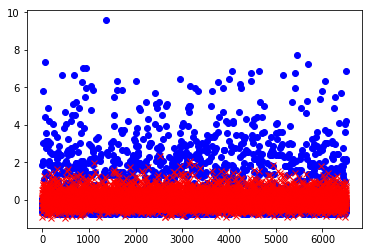

In [144]:
plt.plot(T_test, 'ob')
plt.plot(Ypred, 'xr')

In [145]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt



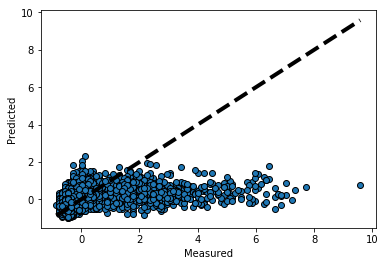

In [146]:
fig, ax = plt.subplots()
ax.scatter(T_test, Ypred, edgecolors=(0, 0, 0))
ax.plot([T_test.min(), T_test.max()], [T_test.min(), T_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

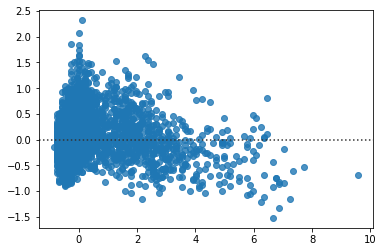

In [147]:
sb.residplot(T_test,Ypred)

# Analysis

After implementing the least squares linear model on the data I noticed the following observations :

1. It is always costly to compute the inverse for large number of arrays
2. It is considering the data as a whole and computing the result.
3. After performing LS on the whole data set and on the partitioned dataset I noticed that the even though the model is able to predict the data, the Root mean square error is high and the prediction is not accurate.
4. RMS value for partioned data is 0.9 and r square value is 0.26
4. Future models may be able to predict the data accurately


# Least Mean Square Implementation on Train and Test Data

Similar to the least square computation, the train values of x and y are passed to train function and the test value of x is passed to use function and the  ytest and the predicted y are compared 

In [148]:
xtr=np.array(X_tr)

In [149]:
pems = LMS(0.01)
pems.train(xtr,T_tr)

In [150]:
Ypredm = pems.use(X_test)

In [151]:
E = T_test-Ypredm
E

array([[-0.630705  ],
       [ 0.19324516],
       [-0.84357285],
       ...,
       [ 1.30144478],
       [-0.42581408],
       [ 0.16329496]])

In [152]:
np.sqrt(np.mean((T_test - Ypredm)**2))

1.149868321893797

In [153]:
r2_score(T_test, Ypredm)

-0.2697974481010226

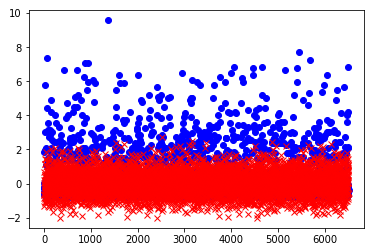

In [154]:
plt.plot(T_test, 'ob')
plt.plot(Ypredm, 'xr')

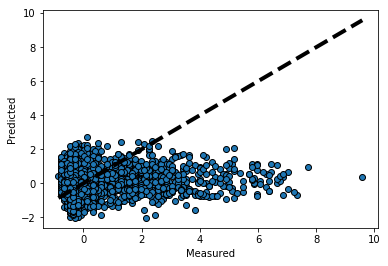

In [155]:
fig, ax = plt.subplots()
ax.scatter(T_test, Ypredm, edgecolors=(0, 0, 0))
ax.plot([T_test.min(), T_test.max()], [T_test.min(), T_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

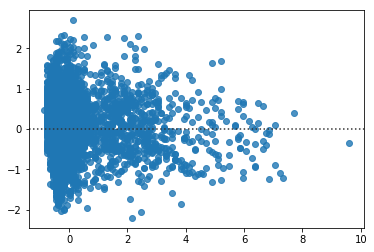

In [156]:
sb.residplot(T_test,Ypredm)

# Analysis

I implemented the linear model for all the train and test at once, then partitioned the data to train and test, using scikit learn package and performed the learn process on the train data and them implemented using the test data.

1. When implementing the linear model for the data as a whole I did not find any deviation and the error was very minimum to 0.5 for LS, and 1.2 for LMS
2. The r square value for the data is 0.8 which is great for a perfect model
3. When the data is split to train and test where 33% of the data was used to train the model and the rest of the data is used in prediction, the r square value is 0.2 which is not so great for a model
4. After plotting the actual and predicted in both the graphs using the scatter plot, it is visible that there is error in the function 
5. LMS is best suited for large data sets as the w value is compute and the model is modified for every input


# Comparisons

The comparison here is between the two models implemented, least square an least mean square

Based on the data set and analysing the plots after implementation of the models, it is clearly seen that 

1. Least Squares model is better for smaller data sets as there is no approximation and it is considering the data as a whole.

2. In least Squares the computation of inverse is very costly for large data sets 

3. Least Mean Squares is most suitable for large number of data sets, as it uses the concept of gradient descendent and uses approximation

4. As there is no inverse calculation for large data sets it is better option to choose.

5. The error value is more in the case of Least Mean squares than Least Squares.

6. Normalization did not add any help to the data and the RMSE value remained the same in both the cases after normalization

7. I observed that this was not very effective in predicting the target value and may be future models will help on this


# Conclusions

This task helped us in clearly understanding all the aspects of linear model anad the implementation of least squares and least mean squares on a dataset. The major issues or challenges I faced for working with is the dimesions of the matrix. I learnt how to reshape them accordingly and how to consider object arrays. Also computation of inverse which might yield to singular matrix and handling it. Splitting the train and test data, normalizing the data, residual plots of the data are interesting to work with.The toughest one was to split the train and train step in LMS class and reshaping attributes of train_step

# References

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
https://stackoverflow.com/questions/41494358/spyder-python-object-arrays-are-currently-not-supported
http://www.statisticshowto.com/least-squares-regression-line/
https://stackoverflow.com/questions/46232449/how-can-i-split-data-in-3-or-more-parts-with-sklearn
http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipynb
http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html
https://seaborn.pydata.org/generated/seaborn.residplot.html

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

In [158]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
        print(i)
    else:
        print(i)
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
0
training  LMS_All ...
1
training  LMS_1STEP ...
2
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


C:\Users\poorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
